<a href="https://colab.research.google.com/github/DashTT/Reto-01-Chagas/blob/main/Reto_1_AndradeVillenasEscobar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/FormatoBaseProyectos/blob/main/Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Carrera de Ciencia de Datos</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático &bull; Reto 1
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Integrantes: Andrade Juan, Escobar David, Villenas Nathaly
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>



En este documento se busca utilizar información sobre las viviendas de Loja del año 2005 para encontrar en estos datos posibles perfiles de viviendas en riesgo de vivir y exponerse a esta enfermedad.

Sabiedo esto, para seleccionar los datos podemos tener varias consideraciones que justamente la Organización Panamericana de Salud da a las personas para evitar el contagio como por ejemplo animales portadores de estas chinches, formas de transmisión y prevención, entre otros. Con ello se trabajará para la selección, análisis y conclusiones del trabajo a realizar en este documento. Dado que es un jupyter notebook, este solo busca dar el código utilizado en la investigación para su replicación y validación.

Posterior a la selección de las variables, se utilizaron técnicas de clusterizado y reducción de dimensiones que se ajusten a los datos categóricos que se extrajeron para este estudio. Dado que técnicas que requieren variables numéricas (al menos de clusterizado) no serían aptas, se optó por una variante de k-means que es, en este caso, k-modes. Esta técnica utiliza la distancia de Hamming para minimizar las disimilitudes de los datos y así encontrar datos parecidos por categorías para la agrupación. En el ámbito de visualización, se usó un Análisis de Componentes Principales para reducir las variables a dos dimensiones y poder visualizar los grupos realizados en el k-modes.

Además, como otro método de clustering se usó clustering jerárquico por distancia de Jaccard para determinar en los tres distintos tipos de enlace que tomamos (single, complete y average) cuál modelo resulta mejor, y en base a eso escoger un umbral de corte que empate el número de clústeres elegidos en k-modes.

---
## <font color='264CC7'> Carga de Librerías </font>

In [2]:
!pip install kmodes

Los paquetes necesarios son:

In [3]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

---
## <font color='264CC7'> Lectura de datos </font>


Primero, empezamos con la carga de los datos.

In [4]:
# Cargar datos
df = pd.read_csv("https://github.com/DashTT/Reto-01-Chagas/blob/main/Conjunto%20de%20datos%20Viviendas_Loja_2005-20251215/Viviendas_Loja_2005.csv?raw=true")
display(df.head())
print(f"Filas: {df.shape[0]} Columnas {df.shape[1]}")
print(df['Status entomologico'].unique())


,Código,Status entomologico,Estado,Localidad,Altitud,Longitud,Latitud,A2. Cuantos dormitorios tiene la vivienda,A3 Número de personas que duermen en la vivienda,A4. Duermen 3 o mas personas en algun dormitorio,...,J3 Cuántas,J4. Palma Africana,J4 Distancia de la casa (metros),J4 Cuántas,J5. Otro tipo de de palmera o palma,J5 Cuál,J5 Distancia de la casa (metros),J5 Cuántas,E10 Cuántos,Unnamed: 138
0,AB007,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,2.0,NaN
1,AB207,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,1.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
2,AB208,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
3,AB209,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,3.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
4,AB210,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,2.0,10.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN


Filas: 1000 Columnas 139
['Negativa' 'Positiva']


---
## <font color='264CC7'> Selección  y preparación de variables </font>


Ahora, el proceso de selección tomó varias cosas a consideración. Estas consideraciones fueron:
* Animales que pueden portar las chinches de familia Triatominae.
* Lugares idóneos donde habitan estas chinches.
* Materiales de acumulación de temperatura ideal para su forma de vida.
* Condiciones climáticas que favorecen su aparición (humedad, luminicidad, entre otros).

Explicación de las variables seleccionadas

Todas estas variables seleccionadas son variables binarias, es decir, pueden únicamente tener un valor positivo (1) y negativo (0). A continuación, se las describirá cada una por su caso positivo:

- Servicio Higienico: Contiene un escusado exlusivo del hogar.
- Techo hormigon: Tiene techo de hormigón.
- Techo asbestos o similares: Tiene techo de asbestos o similares.
- Techo zinc: Tiene techo de zinc.
- Techo teja: Tiene techo de teja.
- Techo palma o similares: Tiene techo de palma o similares.
- Techo otros materiales: Tiene techo de otros materiales diferentes mencionados previamente.
- ParExt HormigonBloqueLadrillo: La pared externa es de bloques de ladrillos.
- ParExt Adobe Tapia: La pared externa es de Adobe.
- ParExt Madera: La pared externa es de madera.
- ParExt GuaRevPapel: La pared externa es de caña guadua revestida con papel.
- ParExt GuadRev o RellBarro: La pared externa es de caña guadua revestida o rellena con barro.
- ParExt GuadNoRev: La pared externa es de caña guadua sin revestimiento.
- Piso entablado rustico: El piso es de entablado rústico.
- Piso parquet: El piso es de parquet.
- Piso baldosa: El piso es de baldosa.
- Piso ladrillo o cemento: El piso es de ladrillo o cemento.
- Piso caña guadua: El piso es de caña guadua.
- Piso tierra: El piso es de tierra.
- Piso otros: El piso es de otros materiales no especificados.
- Gallinas: Hay presencia de gallinas en un radio menor a cinco metros.
- Cuyera: Hay presencia de cuyes en un radio menor a cinco metros.
- CorralChivosOvejas: Hay presencia de ovejas o chivos en un radio menor a cinco metros.
- Ratones: Avistamiento frecuente de ratones durante los últimos seis meses.
- Ratas: Avistamiento frecuente de ratas durante los últimos seis meses.
- Hojas Palma Coco: Existe acumulación de hojas palma de Coco alrededor de la vivienda.
- Hojas de palma cade o tagua: Existe acumulación de hojas de palma de Cade o Tagua alrededor de la vivienda.
- Hojas de otro tipo de palmera o palma: Existen hojas de otros tipos de palmera o palma.
- Desperdicios de cosecha: Existe acumulación de desperdicios de la cosecha.
- Productos agrícolas de cosecha: Existe acumulación de productos agrícolas de la cosecha.
- Piñuelas: Presencia de Piñuelas alrededor a la vivienda.
- Arbustos: Presencia de Arbustos alrededor a la vivienda.
- Arboles frutales: Presencia de Arbustos frutales a la vivienda.
- Maleza o monte: Presencia de maleza o monte alrededor a la vivienda.
- Palma coco: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Palma cade o tagua: Presencia de palma de Cade o Tagua alrededor de 30 metros de la vivienda.
- Palma africana: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Otro tipo de de palmera o palma: Presencia de otros tipos de palmera o palma no mencionados antes alrededor de 30 metros de la vivienda.

Renombrar variables verdadero o falso

In [5]:
# Renombrar columnas booleanas (VERDADERO / FALSO)
rename_bool_cols = {
    "A5 Escusado de uso exclusivo del hogar": "Servicio Higienico",
    "B1 Losa de hormigón": "Techo hormigon",
    "B1 Asbestos o similares": "Techo asbestos o similares",
    "B1 Zinc": "Techo zinc",
    "B1 Teja": "Techo teja",
    "B1 Paja palma o similares": "Techo palma o similares",
    "B1 Otros materiales": "Techo otros materiales",
    "B2 Hormigón ladrillo o bloque": "ParExt HormigonBloqueLadrillo",
    "B2 Adobe o tapia": "ParExt AdobeTapia",
    "B2 Madera": "ParExt Madera",
    "B2 Caña guadua revestida con papel": "ParExt GuaRevPapel",
    "B2 Caña guadua revestida o rellena de barro": "ParExt GuadRev o RellBarro",
    "B2 Caña guadua no revestida": "ParExt GuadNoRev",
    "B3 Entablado rústico": "Piso entablado rustico",
    "B3 Parquet": "Piso parquet",
    "B3 Baldosa o vinyl": "Piso baldosa",
    "B3 Ladrillo o cemento": "Piso ladrillo o cemento",
    "B3 Caña guadua": "Piso caña guadua",
    "B3 Tierra": "Piso tierra",
    "B3 Otros materiales": "Piso otros",
}

cols_interes = [entry for entry in rename_bool_cols.values()]
df = df.rename(columns=rename_bool_cols)

map_bool = {"VERDADERO": 1, "FALSO": 0}

df[cols_interes] = df[cols_interes].replace(map_bool)



/tmp/ipython-input-4034516437.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_interes] = df[cols_interes].replace(map_bool)


Recodificar las variables binarias E2, E6, E9, F1, F2

In [6]:
df["Gallinas"] = np.where(df["E2. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Cuyera: 1,2,3 = 1  /  0,4,5,6 = 0
df["Cuyera"] = np.where(df["E6. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Corral chivos/ovejas: 1,2,3 = 1  /  4,5,0 = 0
df["CorralChivosOvejas"] = np.where(df["E9. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Ratones: 1,2 = 0 (nunca / rara vez), 3,4 = 1 (frecuente / todo el tiempo)
df["Ratones"] = np.where(df["F1. Ratones"].isin([3, 4]), 1, 0).astype(int)

# Ratas: igual criterio que Ratones
df["Ratas"] = np.where(df["F2. Ratas"].isin([3, 4]), 1, 0).astype(int)

cols_interes.extend(["Gallinas", "Cuyera", "CorralChivosOvejas", "Ratones", "Ratas"])

Recodificar las variables tránsfugas

In [7]:
def recode_1_else_0(series):
    return np.where(series == 1, 1, 0).astype(int)
# H: material vegetal acumulado
df["Hojas Palma Coco"] = recode_1_else_0(df["H1. Hojas de Palma de coco"])
df["Hojas de palma cade o tagua"] = recode_1_else_0(df["H2. Hojas de Palma de Cade o tagua"])
df["Hojas de otro tipo de palmera o palma"] = recode_1_else_0(df["H3. Hojas de Palmera (Otro Tipo)"])
df["Desperdicios de cosecha"] = recode_1_else_0(df["H4. Desperdicios de la cosecha"])
df["Productos agrícolas de cosecha"] = recode_1_else_0(df["H5. Productos agricolas de la cosecha"])

# I: vegetación alrededor de la vivienda
df["Piñuelas"] = recode_1_else_0(df["I1. Piñuelas"])
df["Arbustos"] = recode_1_else_0(df["I2. Arbustos"])
df["Arboles frutales"] = recode_1_else_0(df["I3. Arboles frutales"])
df["Maleza o monte"] = recode_1_else_0(df["I4. Maleza o monte"])

# J: palmas cercanas (a 30 m)
df["Palma coco"] = recode_1_else_0(df["J2. Palmas de coco"])
df["Palma cade o tagua"] = recode_1_else_0(df["J3. Palmas de cade o tagua"])
df["Palma africana"] = recode_1_else_0(df["J4. Palma Africana"])
df["Otro tipo de de palmera o palma"] = recode_1_else_0(df["J5. Otro tipo de de palmera o palma"])

cols_interes.extend([
    "Hojas Palma Coco",
    "Hojas de palma cade o tagua",
    "Hojas de otro tipo de palmera o palma",
    "Desperdicios de cosecha",
    "Productos agrícolas de cosecha",
    "Piñuelas",
    "Arbustos",
    "Arboles frutales",
    "Maleza o monte",
    "Palma coco",
    "Palma cade o tagua",
    "Palma africana",
    "Otro tipo de de palmera o palma"
])


---
## <font color='264CC7'> Limpieza de datos </font>


Selección final y limpieza para trabajo

In [18]:
#Creamos un df previo a la limpieza
df_precleaning = df[cols_interes].copy()

#Calculamos outliers
df_precleaning.isna().sum()

# 11 NA en todos, son coincidentes?

#(df_precleaning.isna().sum().nunique() == 1)
# Sí son. Considerando que 11/1000 = 1.1% y que todos esos NA coinciden en la entrada, vamos a considerarlo como despreciable
# Las variables binarias no tienen outliers así que únicamente nos enfocamos en los nulos

df_clean = df_precleaning.dropna()

y_status = df.loc[df_clean.index, "Status entomologico"]

print(len(cols_interes))


38


---
## <font color='264CC7'> Análisis exploratorio </font>


In [20]:
summary = df_clean[cols_interes].describe()
print(summary.to_string())


       Servicio Higienico  Techo hormigon  Techo asbestos o similares  Techo zinc  Techo teja  Techo palma o similares  Techo otros materiales  ParExt HormigonBloqueLadrillo  ParExt AdobeTapia  ParExt Madera  ParExt GuaRevPapel  ParExt GuadRev o RellBarro  ParExt GuadNoRev  Piso entablado rustico  Piso parquet  Piso baldosa  Piso ladrillo o cemento  Piso caña guadua  Piso tierra  Piso otros    Gallinas      Cuyera  CorralChivosOvejas     Ratones       Ratas  Hojas Palma Coco  Hojas de palma cade o tagua  Hojas de otro tipo de palmera o palma  Desperdicios de cosecha  Productos agrícolas de cosecha    Piñuelas    Arbustos  Arboles frutales  Maleza o monte  Palma coco  Palma cade o tagua  Palma africana  Otro tipo de de palmera o palma
count          989.000000      989.000000                  989.000000  989.000000  989.000000               989.000000              989.000000                     989.000000         989.000000     989.000000          989.000000                  989.000000 

In [24]:
#Creamos una df que contenga la proporción de positivos y negativos de cada una de las variables
prop_1 = df_clean[cols_interes].mean() #proporción de 1
prop_0 = 1 - prop_1 #proporción de 0
prop_df = pd.DataFrame({
    'Negativo (0)': prop_0,
    'Positivo (1)': prop_1
})

print(prop_df)

                                       Negativo (0)  Positivo (1)
Servicio Higienico                         0.687563      0.312437
Techo hormigon                             0.960566      0.039434
Techo asbestos o similares                 0.945399      0.054601
Techo zinc                                 0.875632      0.124368
Techo teja                                 0.190091      0.809909
Techo palma o similares                    0.967644      0.032356
Techo otros materiales                     0.958544      0.041456
ParExt HormigonBloqueLadrillo              0.724975      0.275025
ParExt AdobeTapia                          0.339737      0.660263
ParExt Madera                              0.959555      0.040445
ParExt GuaRevPapel                         0.992922      0.007078
ParExt GuadRev o RellBarro                 0.951466      0.048534
ParExt GuadNoRev                           0.998989      0.001011
Piso entablado rustico                     0.925177      0.074823
Piso parqu

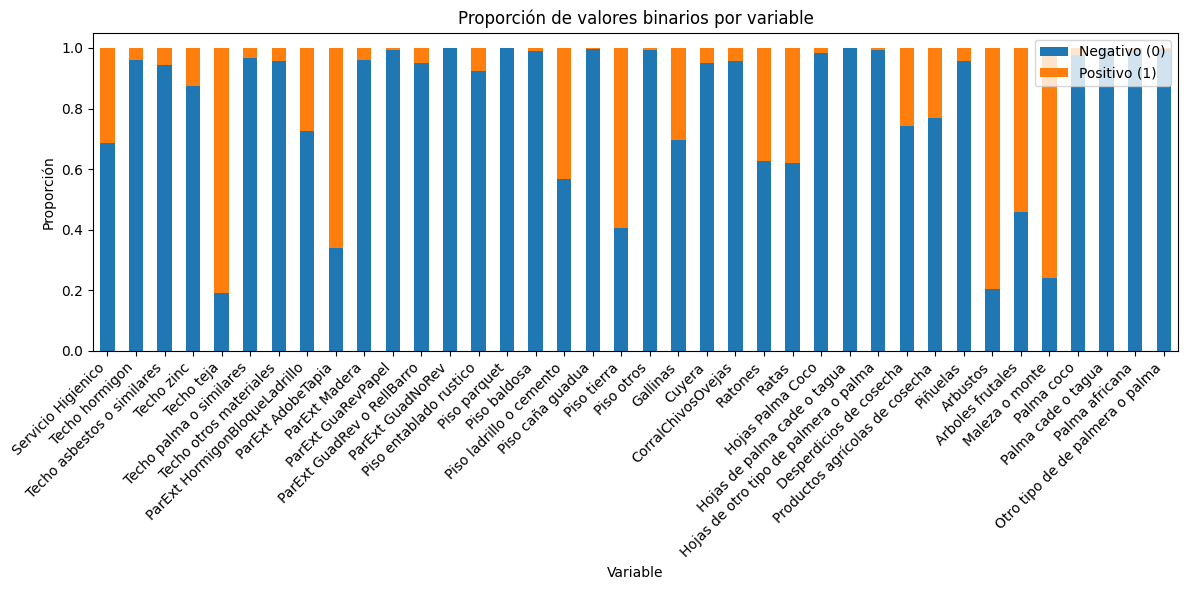

In [25]:
prop_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.ylabel('Proporción')
plt.xlabel('Variable')
plt.title('Proporción de valores binarios por variable')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# <font color='264CC7'> Aplicación de clusterización </font>


## K Modes

Selección de K a través del método del codo en inercia y silueta.

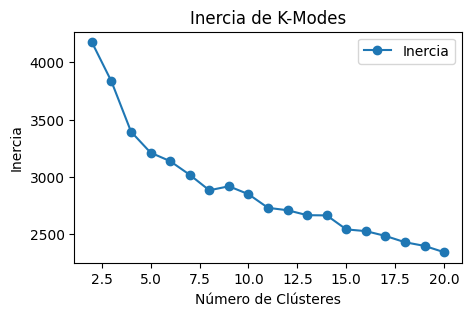

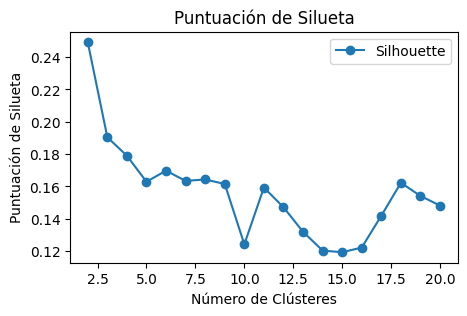

In [32]:
inertia = []
silueta = []

for i in range(2, 21):  # de 2 a 10 clústeres
    modelo = KModes(n_clusters=i, init='Huang', n_init=5, random_state=68)
    modelo.fit(df_clean)

    labels = modelo.labels_
    score = silhouette_score(df_clean, labels, metric='hamming')
    silueta.append(score)

    inertia.append(modelo.cost_)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), inertia, marker='o', label="Inercia")
plt.title('Inercia de K-Modes')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.legend()

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), silueta, marker='o', label="Silhouette")
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.legend()

plt.show()

Observando el gráfico de inercia, el codo parece está alrededor de 5, en el gráfico de silueta notamos que el mejor K = 2, pero no es necesariamente aceptable en este contexto. Para la visualización aplicaremos un análisis de componentes principales.

In [29]:
pca = PCA(n_components=2, random_state=68)
X_2d = pca.fit_transform(df_clean)

#Vamos a analizar las cargas
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_clean.columns,
    columns=["PC1", "PC2"]
)
#Consiguemos las 3 variables más relacionadas de las dos primeras componentes
for pc in loadings.columns[:2]:
    top = loadings[pc].abs().nlargest(3).index
    print(f"\n{pc}")
    print(loadings.loc[top, pc])


PC1
Piso tierra                0.458313
ParExt AdobeTapia          0.393841
Piso ladrillo o cemento   -0.382244
Name: PC1, dtype: float64

PC2
Ratas                      0.436301
Ratones                    0.419791
Piso ladrillo o cemento    0.398972
Name: PC2, dtype: float64


Vamos a interpretar estas dos componentes:

- PC1: Considerando que se relacion positivamente con "piso tierra", "pared de adobe o tapia" e inversamreente con "ladrillo o cemento" vamos a llamarla componente de calidad de la vivienda.
- PC2: Considerando que se relaciona positivamente con "ratas", "ratones" y "piso de ladrillo o cemento" la vamos a llamar componente de presencia de roedores.

PC1: 0.1845 (18.45%) Varianza explicada
PC2: 0.1092 (10.92%) Varianza explicada


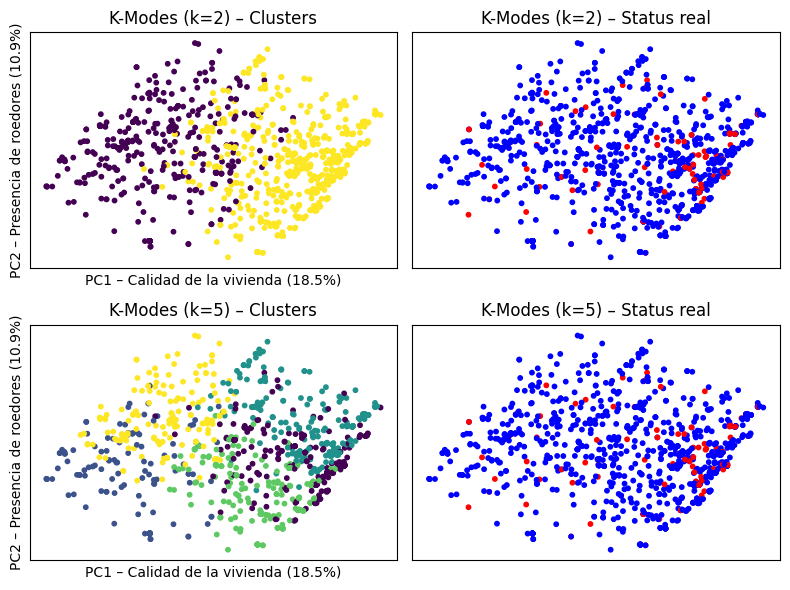

infectado,cluster,Negativa,Positiva,n_cluster,n_positivos,silueta_global,k
0,0,0.923304,0.076696,339,26,0.249178,2
1,1,0.886154,0.113846,650,74,0.249178,2
2,0,0.873171,0.126829,205,26,0.162941,5
3,1,0.902256,0.097744,133,13,0.162941,5
4,2,0.876923,0.123077,260,32,0.162941,5
5,3,0.900452,0.099548,221,22,0.162941,5
6,4,0.958824,0.041176,170,7,0.162941,5


In [37]:

for i, v in enumerate(pca.explained_variance_ratio_, start=1):
  print(f"PC{i}: {v:.4f} ({v*100:.2f}%) Varianza explicada")
  #Reservamos estos resultados
  pc1_var = pca.explained_variance_ratio_[0] * 100
  pc2_var = pca.explained_variance_ratio_[1] * 100
#Coloreamos en base a positivo o negativo
y_colors = np.where(y_status == 'Negativa', 'blue', 'red')

xlabel = f'PC1 – Calidad de la vivienda ({pc1_var:.1f}%)'
ylabel = f'PC2 – Presencia de roedores ({pc2_var:.1f}%)'

ks = [2, 5]
resultados = []


fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for row, k in enumerate(ks):
    # Graficación
    modelo = KModes(n_clusters=k, init='Huang', n_init=5, random_state=68)
    labels = modelo.fit_predict(df_clean)

    axes[row, 0].scatter(
        X_2d[:, 0], X_2d[:, 1],
        c=labels, s=10
    )
    axes[row, 0].set_title(f'K-Modes (k={k}) – Clusters')
    axes[row, 0].set_xlabel(xlabel)
    axes[row, 0].set_ylabel(ylabel)

    axes[row, 1].scatter(
        X_2d[:, 0], X_2d[:, 1],
        c=y_colors, s=10
    )
    axes[row, 1].set_title(f'K-Modes (k={k}) – Status real')

    # Agreamos la proporción de infectados / no infectados a la tabla para visualizar y la silueta

     # Tamaño del clúster

    sil_global = silhouette_score(df_clean, labels, metric='hamming')

    df_res = pd.DataFrame({
        'cluster': labels,
        'infectado': y_status.values
    })

    tabla = (
        df_res
        .groupby('cluster')['infectado']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Tamaño del clúster
    tabla['n_cluster'] = df_res.groupby('cluster').size()

    # Número de positivos
    tabla['n_positivos'] = (
        df_res['infectado']
        .eq('Positiva')
        .groupby(df_res['cluster'])
        .sum()
    )

    # Silueta global (misma para todos los clusters de ese k)
    tabla['silueta_global'] = sil_global

    tabla['k'] = k
    resultados.append(tabla.reset_index())

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
df_resultados = pd.concat(resultados, ignore_index=True)
df_resultados

Utilizando k = 2, obtenemos dos clústers, cuales:
- Clúster 1 : Proporción de infectados 7.7%, con 339 observaciones.
- Clúster 2 : Proporción de infectados 11.4%, con 650 observaciones.


Para k = 5.

- Clúster 1: Proporción de infectados 12.7%, con 205 observaciones.
- Clúster 2: Proporción de infectados 9.8%, con 133 observaciones.
- Clúster 3: Proporción de infectados 12.3%, con 260 observaciones.
- Clúster 4: Proporción de infectados 10.0%, con 221 observaciones.
- Clúster 5: Proporción de infectados 4.1%, con 170 observaciones; es el clúster con menor presencia de infectados.


## Clustering Jerárquico con la distancia de Jaccard

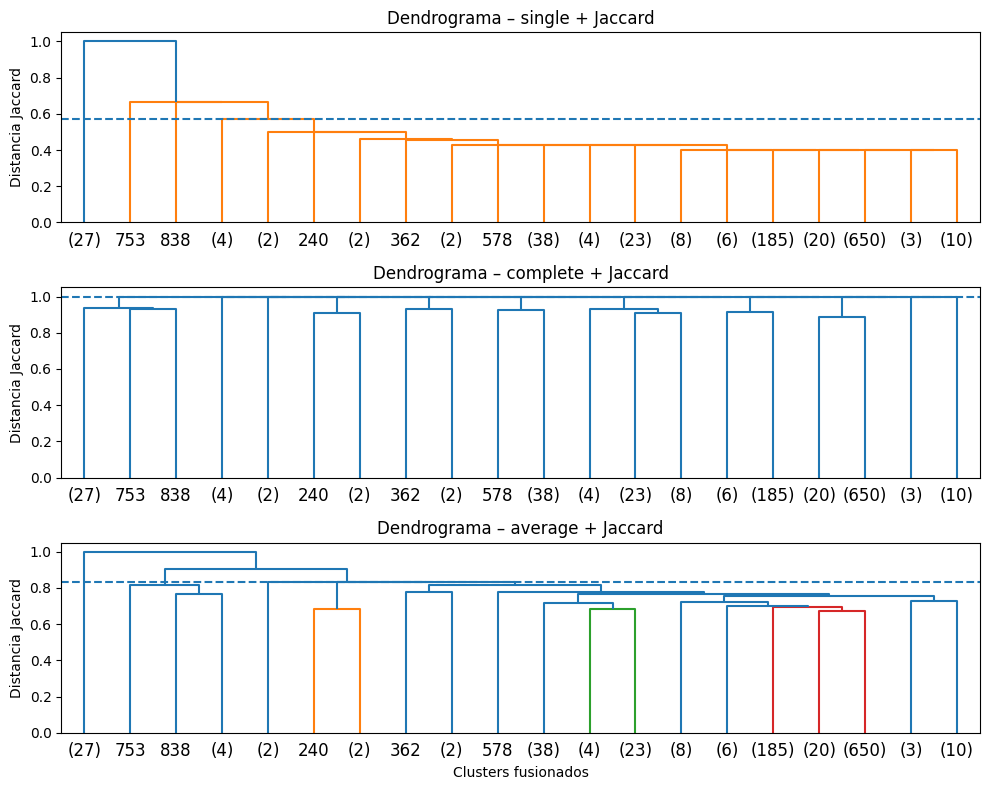

In [11]:
methods = ['single', 'complete', 'average']
k = 5

dist_jaccard = pdist(df_clean, metric='jaccard')

fig, axes = plt.subplots(len(methods), 1, figsize=(10, 8), sharex=True)

for i, method in enumerate(methods):
    Z = linkage(dist_jaccard, method=method)

    # altura de corte para k clusters
    dist_corte = Z[-(k-1), 2]

    dendrogram(
        Z,
        ax=axes[i],
        truncate_mode='lastp',
        p=20,
        show_leaf_counts=True
    )

    axes[i].axhline(y=dist_corte, linestyle='--')
    axes[i].set_title(f'Dendrograma – {method} + Jaccard')
    axes[i].set_ylabel('Distancia Jaccard')

axes[-1].set_xlabel('Clusters fusionados')
plt.tight_layout()
plt.show()

In [40]:

ks = [2, 5]
resultados = []

for i in ks:
  k = i
  for method in methods:
      Z = linkage(dist_jaccard, method=method)
      clusters = fcluster(Z, t=k, criterion='maxclust')

      df_res = pd.DataFrame({
          'cluster': clusters,
          'infectado': y_status
      })

      # Computamos proporciones
      tabla = (
          df_res
          .groupby('cluster')['infectado']
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
      )

      # Tamaño del cluster
      tabla['n_cluster'] = df_res.groupby('cluster').size()

      # Cantidad de positivos
      tabla['n_positivos'] = (
          df_res['infectado']
          .eq('Positiva')
          .groupby(df_res['cluster'])
          .sum()
      )

      # Silueta global
      tabla['silueta_global'] = sil_global

      tabla['method'] = method
      tabla['k'] = k

      resultados.append(tabla.reset_index())

df_resultados = pd.concat(resultados, ignore_index=True)
df_resultados

infectado,cluster,Negativa,Positiva,n_cluster,n_positivos,silueta_global,method,k
0,1,0.962963,0.037037,27,1,0.162941,single,2
1,2,0.897089,0.102911,962,99,0.162941,single,2
2,1,0.898888,0.101112,989,100,0.162941,complete,2
3,1,0.962963,0.037037,27,1,0.162941,average,2
4,2,0.897089,0.102911,962,99,0.162941,average,2
5,1,0.962963,0.037037,27,1,0.162941,single,5
6,2,0.897810,0.102190,959,98,0.162941,single,5
7,3,0.000000,1.000000,1,1,0.162941,single,5
8,4,1.000000,0.000000,1,0,0.162941,single,5
9,5,1.000000,0.000000,1,0,0.162941,single,5


k = 2 (método single)
- Clúster 1: Proporción de infectados 3.7%, con 27 observaciones.
- Clúster 2: Proporción de infectados 10.3%, con 962 observaciones.

k = 2 (método complete)
- Clúster 1: Proporción de infectados 10.1%, con 989 observaciones.

k = 2 (método average)
- Clúster 1: Proporción de infectados 3.7%, con 27 observaciones.
- Clúster 2: Proporción de infectados 10.3%, con 962 observaciones.

k = 5 (método single)
- Clúster 1: Proporción de infectados 3.7%, con 27 observaciones.
- Clúster 2: Proporción de infectados 10.2%, con 959 observaciones.
- Clúster 3: Proporción de infectados 100.0%, con 1 observación.
- Clúster 4: Proporción de infectados 0.0%, con 1 observación.
- Clúster 5: Proporción de infectados 0.0%, con 1 observación.

k = 5 (método complete)
- Clúster 1: Proporción de infectados 10.1%, con 989 observaciones.

k = 5 (método average)
- Clúster 1: Proporción de infectados 3.7%, con 27 observaciones.
- Clúster 2: Proporción de infectados 16.7%, con 6 observaciones.
- Clúster 3: Proporción de infectados 0.0%, con 2 observaciones.
- Clúster 4: Proporción de infectados 33.3%, con 3 observaciones.
- Clúster 5: Proporción de infectados 10.2%, con 951 observaciones.


Considerando que la distribución de elementos entre clústeres es demasiado desequilibrada, terminando la gran mayoría de elementos en un solo clúster, vamos a considerar estos resultados como despreciables y no los vamos a visualizar.

---
## <font color='264CC7'> Interpretación y conclusiones de (mejores) resultados </font>


Tomamos la decisión lógica de primero acabar con todas las agrupaciones antes de interpretar y concluir, debido a que quisimos seleccionar la que de mejor resultados.

Hemos seleccionado el mejor agrupamiento en base a que aporta la utilidad de que si se fuese a realizar un diagnóstico de un grupo grande, la clusterización puede establecer un orden lógico de grupos prioritarios.

La mejor agrupación fue en K-modas cuando k = 5, recordando que:

Para k = 5.

- Clúster 1: Proporción de infectados 12.7%, con 205 observaciones.
- Clúster 2: Proporción de infectados 9.8%, con 133 observaciones.
- Clúster 3: Proporción de infectados 12.3%, con 260 observaciones.
- Clúster 4: Proporción de infectados 10.0%, con 221 observaciones.
- Clúster 5: Proporción de infectados 4.1%, con 170 observaciones; es el clúster con menor presencia de infectados.

Ahora, basándonos en su proporción de infectados le vamos a dar nombres que remarquen esta relación de prioridad

- Clúster 1: Grupo de prioridad alta.
- Clúster 3: Grupo de prioridad media alta.
- Clúster 4: Grupo de prioridad media.
- Clúster 2: Grupo de prioridad media baja.
- Clúster 5: Grupo de prioriodad baja.


Finalmente, para distinguir las características de los clústers seleccionados, veamos a detalle sus características en el gráfico PCA

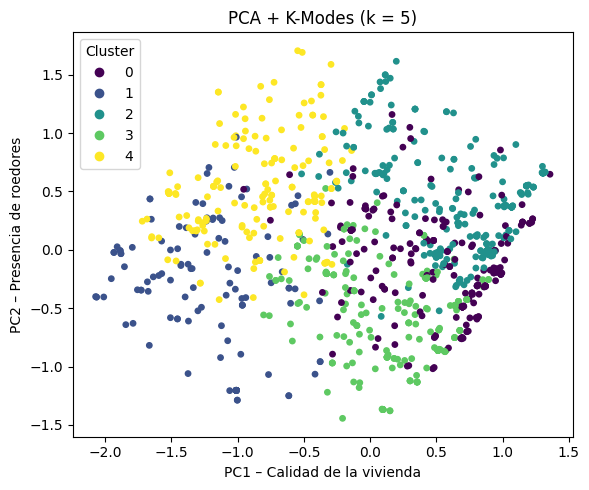

In [43]:

xlabel = f'PC1 – Calidad de la vivienda'
ylabel = f'PC2 – Presencia de roedores'


k = 5
modelo = KModes(n_clusters=k, init='Huang', n_init=5, random_state=68)
labels = modelo.fit_predict(df_clean)


plt.figure(figsize=(6, 5))

scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=labels,
    s=15
)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('PCA + K-Modes (k = 5)')


legend = plt.legend(
    *scatter.legend_elements(),
    title="Cluster",
    loc="best"
)

plt.tight_layout()
plt.show()

- Clúster 1: Calidad de vivienda decente con presencia o no de roedores.
- Clúster 2: Calidad de vivienda baja con presencia o no de roedores.
- Clúster 3: Alta presencia de roedores con calidad de vivienda decente.
- Clúster 4: Calidad de vivienda decente con presencia baja de roedores.
- Clúster 5: Calidad de vivienda baja con alta presencia de roedores.


Debido a que las dos componentes explican tan solo el 28% de la variabilidad es difícil concluir una implicación directa de los resultados, sin embargo el orden de prioridad se mantiene.

En conclusión, utilizando k-modes con k = 5, la agrupación fue consistende de modo que se pudo establecer un orden de prioridad para un diagnóstico masivo, debido a la poca variabilidad de las componentes es difícil interpretar estas agrupaciones mediante el análisis de componentes principales, el mejor orden de diagnóstico es aquel que sigue de mayor a menor la proporción de infectados de las agrupaciones..